Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

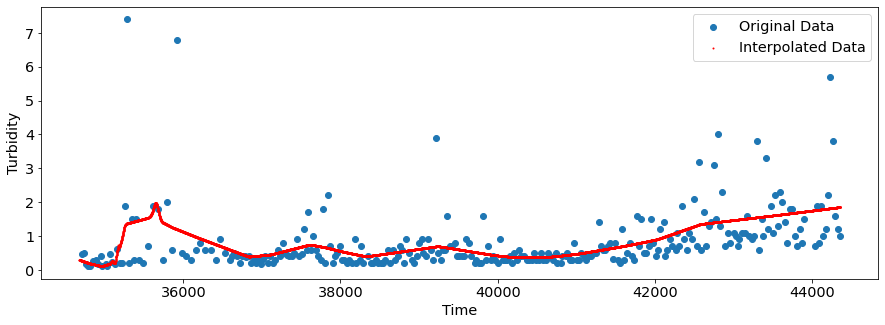

313/313 [==============================] - 0s 346us/step - loss: 9.6204e-17
['loss']


In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation/Turbidity/saved_model/my_modelBB14_Turbidity')

# Check its architecture
model.summary()

df = pd.read_csv("C:/Users/yanzh/Desktop/Turbidity_data/BB14.csv")
time = df['time'].values
turbidity = df['turbidity'].values
df

#Transform the normalized scale to real scale
turbidity_min = 0.1
turbidity_max = 7.4
time_min = 34708.00                
time_max = 44354.39                          

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(turbidity_max - turbidity_min) + turbidity_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, turbidity*(turbidity_max - turbidity_min) + turbidity_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Turbidity')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [2]:
interpolation = model.predict([0.078682322
,0.084798602
,0.091122214
,0.097445827
,0.103769439
,0.110093051
,0.116520329
,0.122636609
,0.128960221
,0.138497473
,0.141607446
,0.147931058
,0.154358336
,0.160474616
,0.166798229
,0.173121841
,0.179445453
,0.185769065
,0.192196343
,0.375166432
,0.95569476
,0.958804734
,0.962018373
])
interpolation

array([[0.18968669],
       [0.19480795],
       [0.20680657],
       [0.25761378],
       [0.19476828],
       [0.17300168],
       [0.16277766],
       [0.15419322],
       [0.14655653],
       [0.13480574],
       [0.13097396],
       [0.12318272],
       [0.1154789 ],
       [0.10840289],
       [0.10108704],
       [0.09377114],
       [0.08645526],
       [0.07913939],
       [0.07170356],
       [0.04205128],
       [0.2233333 ],
       [0.22452983],
       [0.2257663 ]], dtype=float32)